In [ ]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# BCE classifier

> API details.

In [ ]:
#hide
from nbdev.showdoc import *

In [ ]:
from pytorch_inferno.model_wrapper import ModelWrapper
from pytorch_inferno.callback import *
from pytorch_inferno.data import get_paper_data
from pytorch_inferno.plotting import *

from fastcore.all import partialler
import pandas as pd
    
import torch.nn as nn
from torch import optim

In [ ]:
model = ModelWrapper(nn.Sequential(nn.Linear(3,50),nn.ReLU(),nn.Linear(50,1),nn.Sigmoid()))
data, test = get_paper_data(200000, bm=0, bs=64, n_test=1000000)

In [ ]:
model.fit(10, data=data, opt=partialler(optim.SGD,lr=2e-3), loss=nn.BCELoss(),
          cbs=[LossTracker(),EarlyStopping(5)])

Train: 0.4966901410865784 Valid: 0.4289544636631012
Train: 0.40534923367500303 Valid: 0.3855186442756653
Train: 0.37658110804080963 Valid: 0.3660261797809601
Train: 0.36249861998081206 Valid: 0.3558348356628418
Train: 0.3544887504577637 Valid: 0.34917022768974304
Train: 0.3494793567371368 Valid: 0.3451470332431793
Train: 0.3461680270290375 Valid: 0.34231044039726255
Train: 0.3438990193367004 Valid: 0.34049164484024047
Train: 0.3422950953769684 Valid: 0.33911437561988833
Train: 0.34121606632232665 Valid: 0.3382941213798523


In [ ]:
preds = model.predict(test)

In [ ]:
preds

array([[6.1681992e-01],
       [8.8534606e-01],
       [9.6054965e-01],
       ...,
       [1.0580160e-04],
       [1.4479159e-02],
       [8.0806250e-04]], dtype=float32)

In [ ]:
df = pd.DataFrame({'pred':preds.squeeze()})
df['gen_target'] = test.dataset.y
df.head()

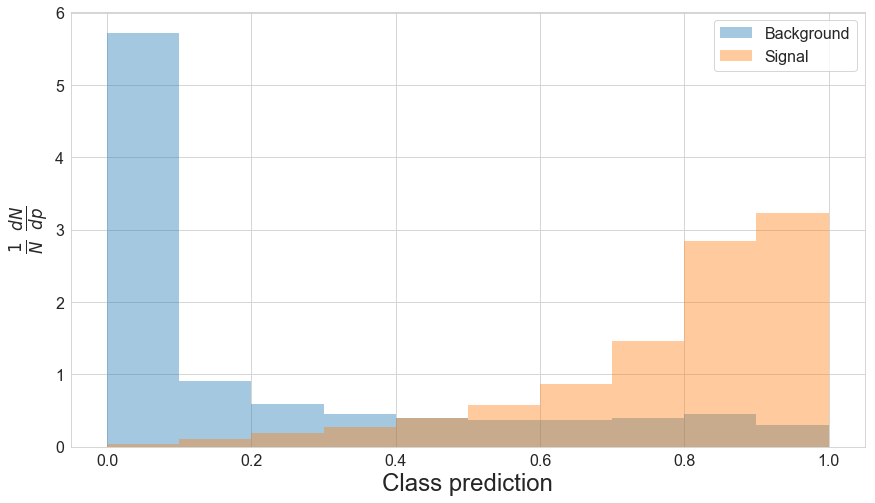

In [ ]:
plot_preds(df)

In [ ]:
def bin_preds(df:pd.DataFrame, bins:np.nda)